# Navigation

---

In this notebook, will be used the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## Start the Environment

We begin by importing some necessary packages. If the code cell below returns an error, check the README file if all the environment is configured correctly.

In [1]:
# This magic code below is used to avoid the need to reimport files if they are edited externally.
%load_ext autoreload
%autoreload 2

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from models import dqn, run_single_episode, Agent
from models.parameters import device, check_device
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Checkig if a GPU is avalilable
check_device()

Using device: cuda:0


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = create_enviroment(file_name="Banana.app")
```

In [4]:
def create_enviroment(file_name):
    return UnityEnvironment(file_name=file_name)

In [5]:
env = create_enviroment("Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
action_size = brain.vector_action_space_size  # number of actions
state = env_info.vector_observations[0]  # examine the state space 
state_size = len(state)


print('Number of agents:', len(env_info.agents)) # number of agents in the environment
print('Number of actions:', action_size)
print('States look like:', state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


## Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

In [10]:
score = run_single_episode(env, brain_name)

print(f'Score: {score}')

Score: 0.0


## Training the agent

Let's start training an agent in this environment. 

The function `dqn` from `models` package is the function that will train the Deep Q Learning model by learning from each episode until it achieves an average of 13 in scores for 100 consecutive episodes.

> The Deep Q-Network (DQN) uses a Deep Neural Network in place of a Q-Table. This strategy is required for this type of problem because we have numerous observation space (37) and many of these observations are continuous. If we try to discretize this problem, a huge Q-Table will be generated (so many action/state pairs), and the problem will probably be infeasible to solve. The Deep Neural Network will create a non-linear function approximation for the Q-Table that will require fewer episodes to converge the training of the agent.

The chosen architecture uses an experience replay to breaks harmful correlations between episodes and to repeat rare episodes.

Another technique used was Fixed Q Table to avoid update a guess with a guess. The target Q Network updated only after 4 steps (UPDATE_EVERY parameter).

* Chosen parameters:
```python
BUFFER_SIZE = 100_000   # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 0.001             # for soft update of target parameters
LR = 0.0005             # learning rate 
UPDATE_EVERY = 4        # how often to update the network
```

* Epsilon-gredy parameters:
```python
eps_start = 1.0         # starting value of epsilon
eps_end = 0.01          # minimum value of epsilon
eps_decay = 0.995       # multiplicative factor (per episode) for decreasing epsilon
```

* The Q Network for both local and target has the architecture drawn below.

`input -> 37 x 64 x 64 x 4 -> output`

![Q Network draw](assets/nn.png)

> Architecture image generated in [http://alexlenail.me/NN-SVG/index.html](http://alexlenail.me/NN-SVG/index.html)

In [11]:
scores, agent = dqn(env)

Episode 100	Average Score: 1.11
Episode 200	Average Score: 4.64
Episode 300	Average Score: 6.99
Episode 400	Average Score: 10.09
Episode 500	Average Score: 12.50
Episode 600	Average Score: 14.07	Saved!
Episode 700	Average Score: 15.07	Saved!
Episode 800	Average Score: 14.72	Saved!
Episode 900	Average Score: 15.16	Saved!
Episode 1000	Average Score: 15.14	Saved!
Episode 1100	Average Score: 14.94	Saved!
Episode 1200	Average Score: 15.07	Saved!
Episode 1300	Average Score: 15.18	Saved!
Episode 1400	Average Score: 15.06	Saved!
Episode 1500	Average Score: 15.24	Saved!
Episode 1600	Average Score: 15.28	Saved!
Episode 1700	Average Score: 15.15	Saved!
Episode 1800	Average Score: 15.84	Saved!
Episode 1900	Average Score: 15.95	Saved!
Episode 2000	Average Score: 16.02	Saved!



In episode 600, the model already had a score higher than 13 (that indicates a good model). 

Let's plot the scores from all episodes.

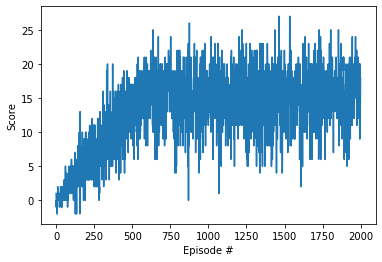

In [12]:
# plot the scores
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Testing the trained model

Let's run a single episode to see how the trained model behaves.

In [8]:
# Load the agent from checkpoint
agent = Agent(state_size=state_size, action_size=action_size)
agent.qnetwork_local.load_state_dict(torch.load('results/checkpoint.pth'))

<All keys matched successfully>

In [14]:
# Show Q Network Summary
agent.qnetwork_summary()

- Agent Q Network Summary (both local and target): 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           2,432
            Linear-2                   [-1, 64]           4,160
            Linear-3                    [-1, 4]             260
Total params: 6,852
Trainable params: 6,852
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [22]:
score = run_single_episode(env, brain_name, agent)

print(f'Score: {score}')

Score: 18.0


## Closing the Environment

In [15]:
env.close()

## Future work

The training agent had a great performance, but would probably perform even better if we implement other techniques like:

* Double DQN (DDQN)
* Prioritized experience replay
* Dueling DQN